# Zilu Wang - Car Accident Severity Project

## 1. Introduction/Business Problem
Car accidents happen around us everyday. According to the data reported by World Health Organization, approximately 1.35 million people die each year as a result of road traffic crashes. Road traffic crashes cost most countries 3% of their gross domestic product. The severity of road accidents may differ depending on whether there is only perperty damage, or there are people injured, seriously injured, or dead. In this project, we will be looking at a dataset published by the Seattle Transportation Department which include various features of reported car accidenta. We will look at how these features may affect the severity of road accidents and build a binary classification model to predict the severity level of road accidents given their information. It would be significantly useful for general public to be aware of what aspects may lead to road accidents so people can pay more attention to these aspects. This project can also be useful for health department such as hospitals or insurance enterprises to preparare for the accidents knowing what severity level a road accident may be. For example, if an accidents involves injury, then essential medical care equipments and professionals will be needed; if not, it prevents the waste of unnecessary social resource so other people in need will receive proper assistance. 

## 2. Data Collection
The data we will be using for this project is the dataset from SDOT Traffic Management Division, Traffic Records Group.  This dataset contains all collisions provided by SPD and recorded by Traffic Records including features relative to car accidents such as the location, collision type, number of people involved in the accidents, weather condition, road condition, light condition, whether the driver was under influence or speeding etc. The target feature we want to predict is the severity level of an accidents, level 1 being there is only property damage but no injury; level 2 being there is injury involved in the accident. For more detailed description of each variable, check out the link down below: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf

## 3. Data Understanding

### Load Data and Set up Environment

In [257]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Data-Collisions.csv')

### Overview of dataset

First we will take a look at the first 5 rows of the dataframe. 

In [258]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [259]:
print('The Dimension of this dataset is: ' + str(df.shape))

The Dimension of this dataset is: (194673, 38)


Then we will look at what variables are in this dataframe and their datatypes and statistic descriptions. 

In [260]:
df.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'REPORTNO', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC',
       'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING',
       'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY',
       'HITPARKEDCAR'], dtype=object)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [262]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [263]:
df.describe(include=['O'])

,REPORTNO,STATUS,ADDRTYPE,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYDESC,COLLISIONTYPE,INCDATE,INCDTTM,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
count,194673,194673,192747,191996,84811,5638,194673,189769,194673,194673,...,29805,189789,189592,189661,189503,4667,9333,194655,189769,194673
unique,194670,2,3,24102,2,1,2,10,5985,162058,...,1,4,11,9,9,1,1,115,62,2
top,1776526,Matched,Block,BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB ...,,"Not Enough Information, or Insufficient Locati...",Property Damage Only Collision,Parked Car,2006/11/02 00:00:00+00,11/2/2006,...,Y,N,Clear,Dry,Daylight,Y,Y,32,One parked--one moving,N
freq,2,189786,126926,276,79173,5638,136485,47987,96,96,...,29805,100274,111135,124510,116137,4667,9333,27612,44421,187457


### Numerical and Categorical Variables

Now let's separate numerical and categorical vairables and store them in individual dataframes df_num and df_cat. 

In [264]:
df_num = df[df.select_dtypes(include='number').columns.values.tolist()]
df_num.columns.values

array(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY',
       'INTKEY', 'SEVERITYCODE.1', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'SDOT_COLCODE', 'SDOTCOLNUM',
       'SEGLANEKEY', 'CROSSWALKKEY'], dtype=object)

In [265]:
df_cat = df[df.select_dtypes(include='object').columns.values.tolist()]
df_cat.columns.values

array(['REPORTNO', 'STATUS', 'ADDRTYPE', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYDESC', 'COLLISIONTYPE', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLDESC', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'ST_COLCODE', 'ST_COLDESC', 'HITPARKEDCAR'],
      dtype=object)

### Missing Values

At this stage, we will only look at the number of missing values and their percentage in a column and we will deal with them later. 

In [266]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PEDROWNOTGRNT,190006,0.976026
EXCEPTRSNDESC,189035,0.971039
SPEEDING,185340,0.952058
INATTENTIONIND,164868,0.846897
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
Y,5334,0.027400
X,5334,0.027400


It looks like variables PEDROWNOTGRNT, EXCEPTRSNDESC, SPEEDING, INATTENTIONIND, INTKEY, EXCEPTRSNCODE, SDOTCOLNUM all have missing values in their columns over 40%. Since EXCEPTRSNDESC, INTKEY, EXCEPTRSNCODE, SDOTCOLNUM does not contain much useful informtion therefore we will drop these columns. Then we will take a closer look at variables INATTENTIONIND, UNDERINFL, SPEEDING, PEDROWNOTGRNT later. 

### Data Preprocessing for Visualization

There are some variables that require data preprocessing before we move on to the exploratory data analysis. 

In [267]:
print(df['INATTENTIONIND'].value_counts())
print(df['UNDERINFL'].value_counts())
print(df['SPEEDING'].value_counts())
print(df['PEDROWNOTGRNT'].value_counts())

Y    29805
Name: INATTENTIONIND, dtype: int64
N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64
Y    9333
Name: SPEEDING, dtype: int64
Y    4667
Name: PEDROWNOTGRNT, dtype: int64


In the dataset, these 3 columns INATTENTIONIND, SPEEDING, PEDROWNOTGRNT only contain value 'Y', NaN indicates this condition does not apply. For further data visualization and machine learning model building, I will replace value 'Y' with integer 1, and fill in NaN values with integer 0. For column UNDERINFL, it has 4 values: 'Y', 'N', 1, and 0. For the same purpose, we will replace 'Y' and 'N' with integer 1 and 0 respectively so we can better visualize the data. 


To avoid overwriting the original dataset, we will make a copy of the original dataframe and store it in object named all_data. 

In [268]:
all_data = df.copy()
all_data.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [269]:
all_data['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
all_data['INATTENTIONIND'].replace('Y', 1, inplace = True)
all_data['UNDERINFL'].replace('N', 0, inplace = True)
all_data['UNDERINFL'].replace(np.nan, 0, inplace = True)
all_data['UNDERINFL'].replace('Y', 1, inplace = True)
all_data["UNDERINFL"] = all_data["UNDERINFL"].astype(str).astype(int)
all_data['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
all_data['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
all_data['SPEEDING'].replace(np.nan, 0, inplace = True)
all_data['SPEEDING'].replace('Y', 1, inplace = True)
all_data['HITPARKEDCAR'].replace('Y', 1, inplace = True)
all_data['HITPARKEDCAR'].replace('N', 0, inplace = True)

In [270]:
print(all_data['INATTENTIONIND'].value_counts())
print(all_data['UNDERINFL'].value_counts())
print(all_data['SPEEDING'].value_counts())
print(all_data['PEDROWNOTGRNT'].value_counts())

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64
0    185552
1      9121
Name: UNDERINFL, dtype: int64
0    185340
1      9333
Name: SPEEDING, dtype: int64
0    190006
1      4667
Name: PEDROWNOTGRNT, dtype: int64


Now the dataset is ready for exploratory data analysis!

## 4. Exploratory Data Analysis (EDA)


Here we will first look at the numerical variables and their distribution. 

### Accident Severity Level

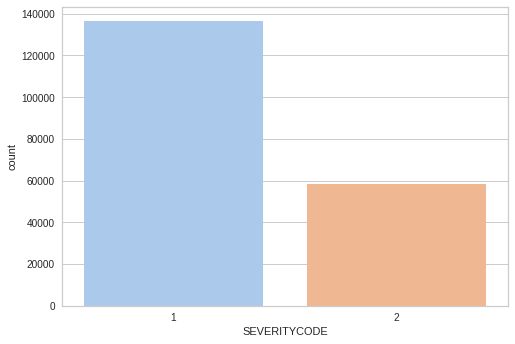

In [271]:
sns.countplot(all_data['SEVERITYCODE'], palette = 'pastel')
plt.show()

At the first glance, we can see the majority entries in this dataset is Level 1, around 70% of the data is assigned to the level 1 group, that is something that we should keep in mind when we do data pre-processing before feeding into machine learning models since the data is not balanced. 

### Distribution of Pedestrian, Bicycles, Vehicle and Person Count

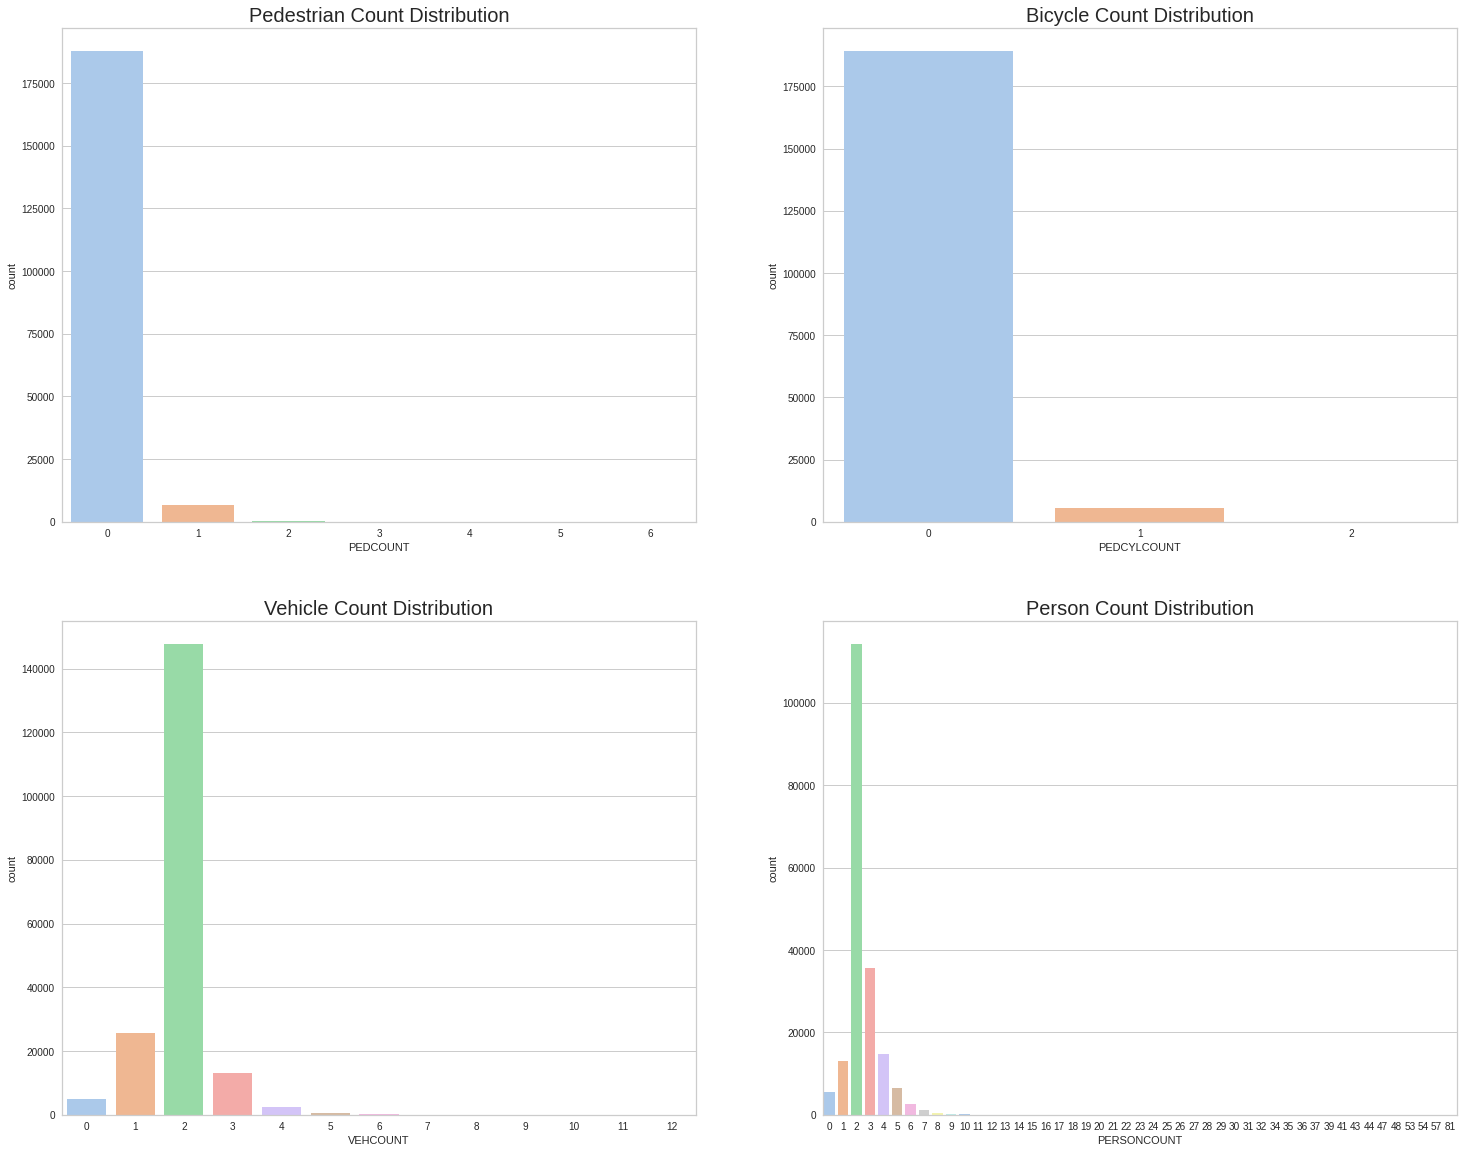

In [272]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 20))
sns.countplot(all_data['PEDCOUNT'], ax = ax1, palette = 'pastel')
ax1.set_title('Pedestrian Count Distribution', size = 20)
sns.countplot(all_data['PEDCYLCOUNT'], ax = ax2, palette = 'pastel')
ax2.set_title('Bicycle Count Distribution', size = 20)
sns.countplot(all_data['VEHCOUNT'], ax = ax3, palette = 'pastel')
ax3.set_title('Vehicle Count Distribution', size = 20)
sns.countplot(all_data['PERSONCOUNT'], ax = ax4, palette = 'pastel')
ax4.set_title('Person Count Distribution', size = 20)
plt.show()

In this section, we can see from the distribution of data that in most cases, the number of pedestrians and bicycles are 0. There are no cases where the number of bicycles involved in an accident is more than 2. 

The distribution of vehicle count and person count is right skewed. Most car accidents involve 2 vehicles, which makes sense; the number of people involved in a single accident can go up to 81 people, but the majority cases involve 2 people. 

Next, we will go ahead and take a look at the categorial variables. 

### Distribution of Accidents Count for Weather Type, Light Condition, Road Condition, Collision Type, Junction Type and Address Type

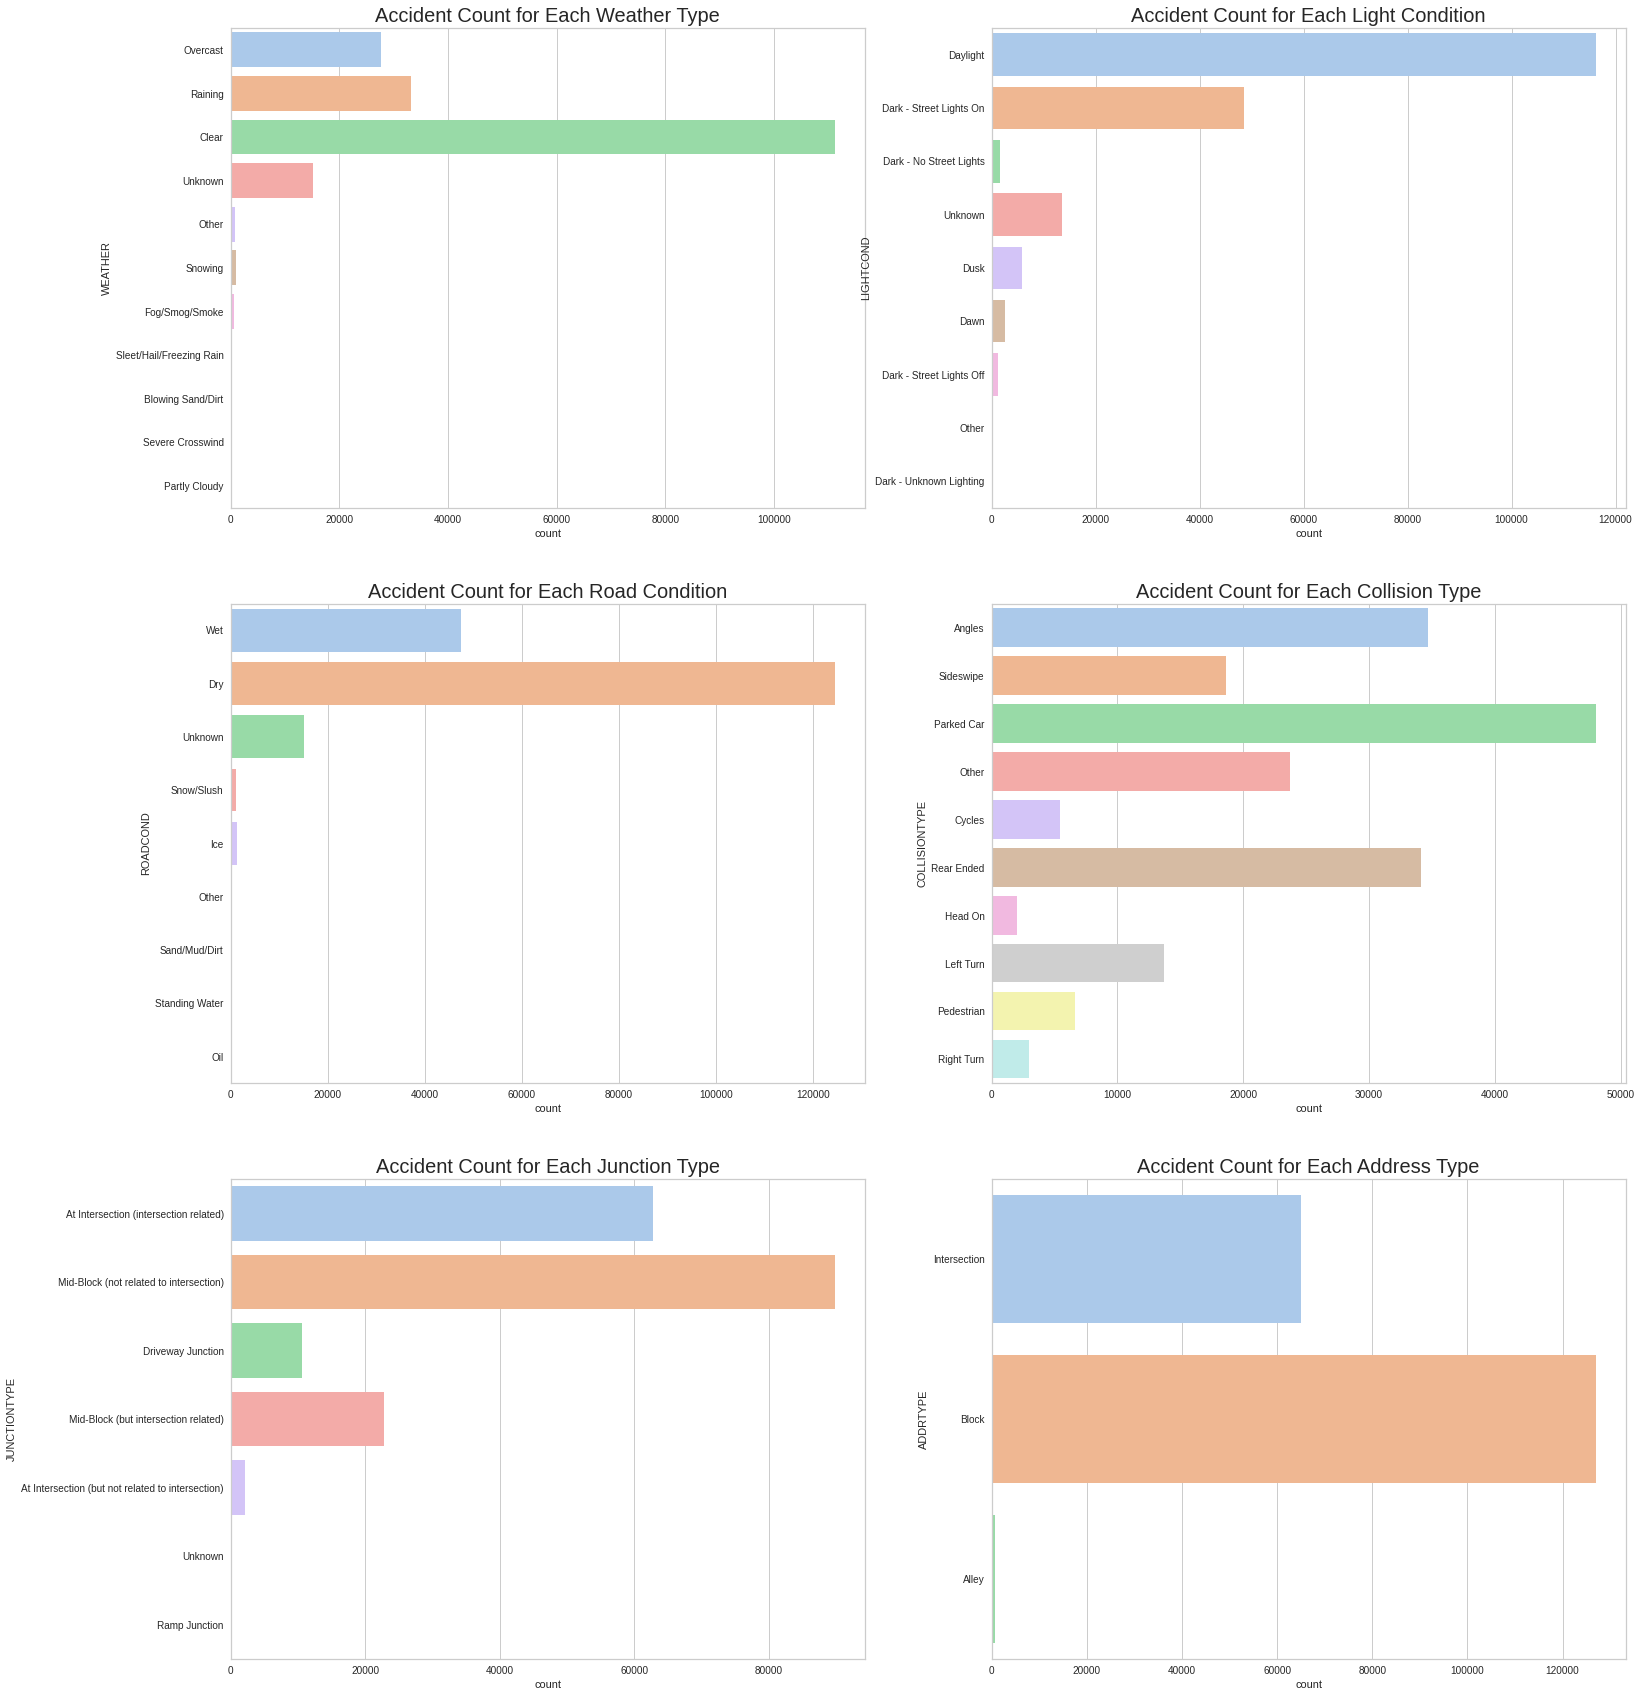

In [273]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3, ncols = 2, figsize = (25, 30))
sns.countplot(y = all_data['WEATHER'], ax = ax1, palette = 'pastel')
ax1.set_title('Accident Count for Each Weather Type', size = 20)
sns.countplot(y = all_data['LIGHTCOND'], ax = ax2, palette = 'pastel')
ax2.set_title('Accident Count for Each Light Condition', size = 20)
sns.countplot(y = all_data['ROADCOND'], ax = ax3, palette = 'pastel')
ax3.set_title('Accident Count for Each Road Condition', size = 20)
sns.countplot(y = all_data['COLLISIONTYPE'], ax = ax4, palette = 'pastel')
ax4.set_title('Accident Count for Each Collision Type', size = 20)
sns.countplot(y = all_data['JUNCTIONTYPE'], ax = ax5, palette = 'pastel')
ax5.set_title('Accident Count for Each Junction Type', size = 20)
sns.countplot(y = all_data['ADDRTYPE'], ax = ax6, palette = 'pastel')
ax6.set_title('Accident Count for Each Address Type', size = 20)
plt.show()

Here we are looking at the value counts for different categorical variables in this dataset. From these plots we are able to see that most car accidents happen during daytime under normal weather and road conditions. Among all types of collisions, hitting a parked car, rear-end collision, and angle collisions are the most common types of collision. As far as the location of car accidents, most car accidents happen at mid block and intersections. 

### Weather Type VS Severity level

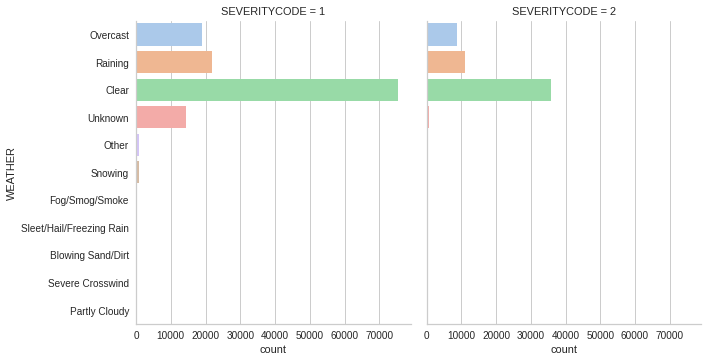

In [274]:
sns.catplot(y="WEATHER", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

Here we don't really see anything too exiting, except for the fact that if accidents happen under 'unkown' weather, it is more likely to be level 1 accident. 

### Collision Type VS Severity Level

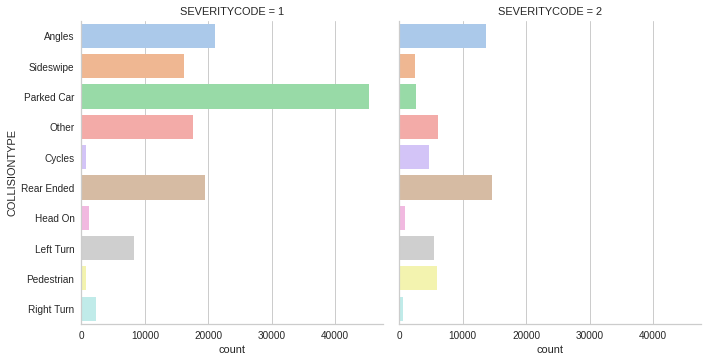

In [275]:
sns.catplot(y="COLLISIONTYPE", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

In this part, we can see that if an accident involves sideswipe and parked car, it is very likely to be level 1 accidents. If an accident involves cycles and pedestrians, it is more likely to be level 2 accident. 

### Road Condition VS Severity Level

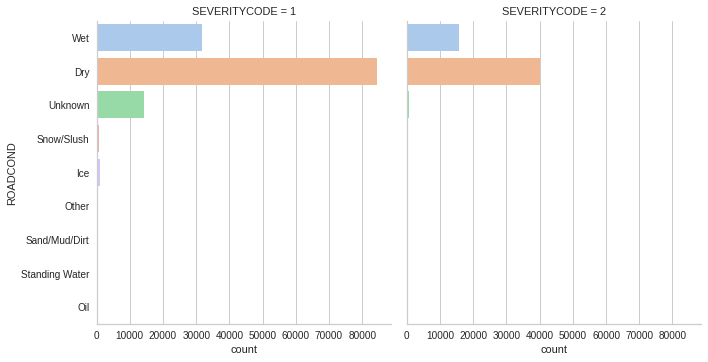

In [276]:
sns.catplot(y="ROADCOND", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

### Light Condition VS Severity Code

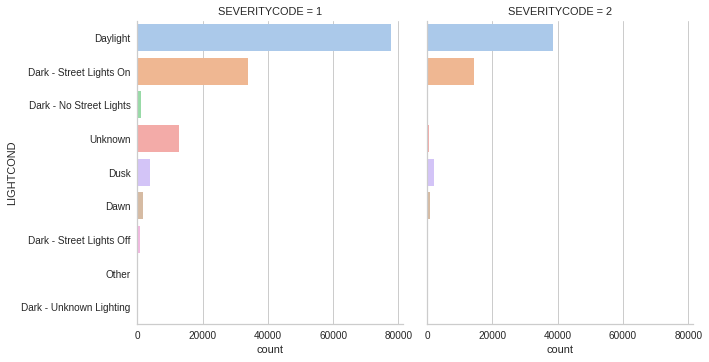

In [277]:
sns.catplot(y="LIGHTCOND", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

### Junction Type VS Severity Code

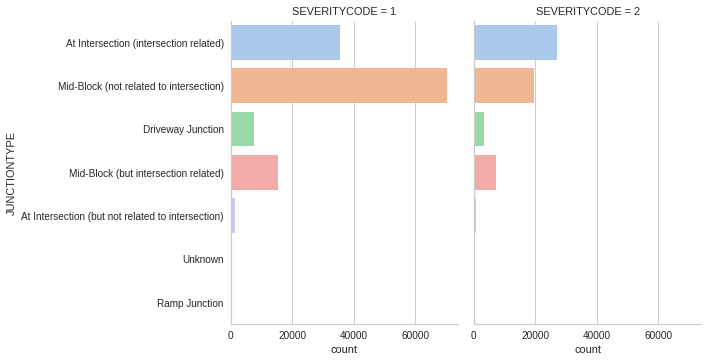

In [278]:
sns.catplot(y="JUNCTIONTYPE", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

### Address Type VS Severity Code

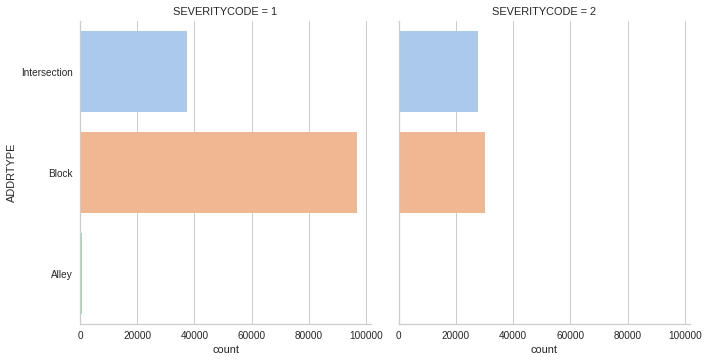

In [279]:
sns.catplot(y="ADDRTYPE", col="SEVERITYCODE",
                data=all_data, kind="count", palette = 'pastel')

The two plots above show that if an accident happens at mid-block, it's more likely to be level 1 accident. 

### Under Influence

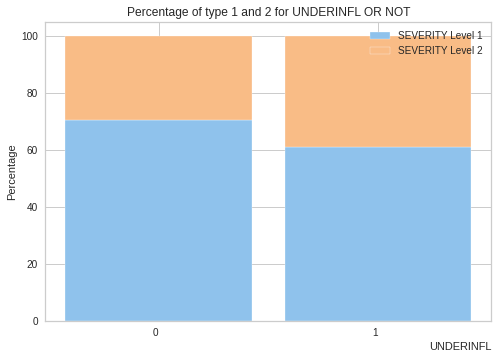

In [280]:
grp = all_data.groupby('SEVERITYCODE')
r = list(range(int(len(grp['UNDERINFL'].value_counts().values)/2)))
raw_data = {'greenBars': grp['UNDERINFL'].value_counts().values.tolist()[0:int(len(grp['UNDERINFL'].value_counts().values)/2)], 'orangeBars': grp['UNDERINFL'].value_counts().values.tolist()[int(len(grp['UNDERINFL'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['UNDERINFL'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('UNDERINFL', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for UNDERINFL OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

### Inattention

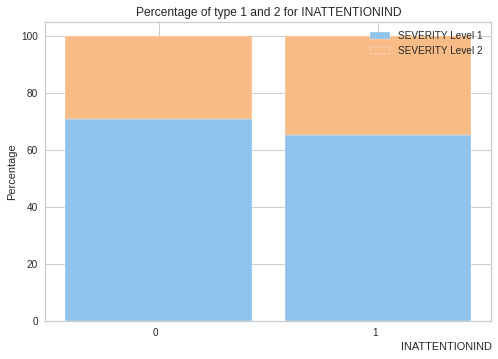

In [281]:
r = list(range(int(len(grp['INATTENTIONIND'].value_counts().values)/2)))
raw_data = {'greenBars': grp['INATTENTIONIND'].value_counts().values.tolist()[0:int(len(grp['INATTENTIONIND'].value_counts().values)/2)], 'orangeBars': grp['INATTENTIONIND'].value_counts().values.tolist()[int(len(grp['INATTENTIONIND'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['INATTENTIONIND'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('INATTENTIONIND', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for INATTENTIONIND')
plt.legend(facecolor='white', framealpha=1)
plt.show()

### Speeding

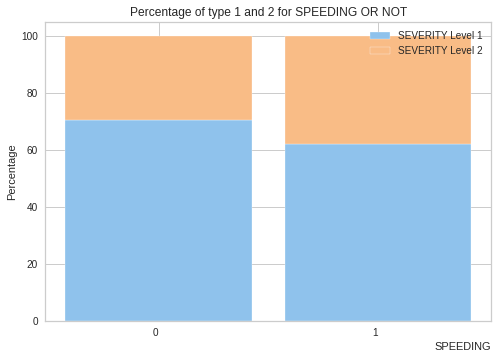

In [282]:
r = list(range(int(len(grp['SPEEDING'].value_counts().values)/2)))
raw_data = {'greenBars': grp['SPEEDING'].value_counts().values.tolist()[0:int(len(grp['SPEEDING'].value_counts().values)/2)], 'orangeBars': grp['SPEEDING'].value_counts().values.tolist()[int(len(grp['SPEEDING'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['SPEEDING'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('SPEEDING', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for SPEEDING OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

From this part we can see that in cases where drivers are under influence, speeding, or distracted driving, the ratio of accidents being level 2 increases roughly 10%. 

### Pedestrian right of way was granted

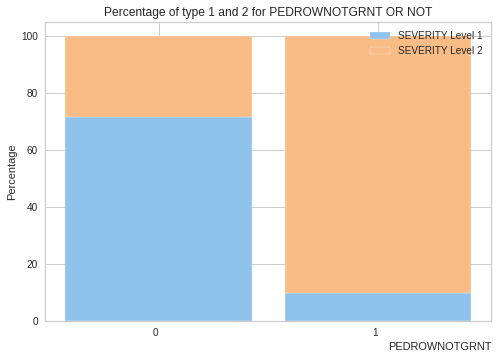

In [283]:
r = list(range(int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2)))
raw_data = {'greenBars': grp['PEDROWNOTGRNT'].value_counts().values.tolist()[0:int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2)], 'orangeBars': grp['PEDROWNOTGRNT'].value_counts().values.tolist()[int(len(grp['PEDROWNOTGRNT'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['PEDROWNOTGRNT'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('PEDROWNOTGRNT', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for PEDROWNOTGRNT OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

In cases where pedestrian right of way was granted, the possibility of it being level 2 accident is very high. 

### Hit Parked Car

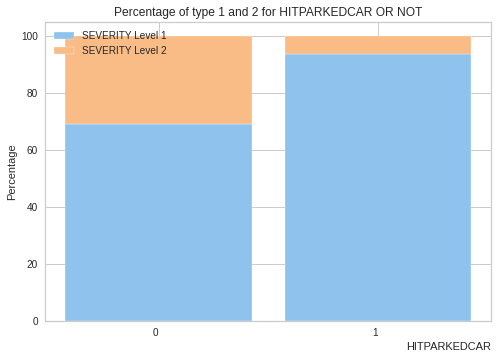

In [284]:
r = list(range(int(len(grp['HITPARKEDCAR'].value_counts().values)/2)))
raw_data = {'greenBars': grp['HITPARKEDCAR'].value_counts().values.tolist()[0:int(len(grp['HITPARKEDCAR'].value_counts().values)/2)], 'orangeBars': grp['HITPARKEDCAR'].value_counts().values.tolist()[int(len(grp['HITPARKEDCAR'].value_counts().values)/2):]}
df_plot = pd.DataFrame(raw_data)
totals = [i+j for i,j in zip(df_plot['greenBars'], df_plot['orangeBars'])]
greenBars = [i / j * 100 for i,j in zip(df_plot['greenBars'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df_plot['orangeBars'], totals)]
barWidth = 0.85
names = all_data['HITPARKEDCAR'].value_counts().index.tolist()
plt.bar(r, greenBars, color='#8FC2EC', edgecolor='white', width=barWidth, label = 'SEVERITY Level 1')
plt.bar(r, orangeBars, bottom=greenBars, color='#f9bc86', edgecolor='white', width=barWidth, label = 'SEVERITY Level 2')
plt.xticks(r, names, ha="right")
plt.xlabel('HITPARKEDCAR', horizontalalignment='right', position=(1,25))
plt.ylabel('Percentage')
plt.title('Percentage of type 1 and 2 for HITPARKEDCAR OR NOT')
plt.legend(facecolor='white', framealpha=1)
plt.show()

Here it shows that if an accident involves in hitting a parked car, it's usually a level 1 accident. 

### Correlation Between Numerical Variables

In [159]:
all_data_num = all_data[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
all_data_num.corr()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
SEVERITYCODE,1.000000,0.130949,0.246338,0.214218,-0.054686
PERSONCOUNT,0.130949,1.000000,-0.023464,-0.038809,0.380523
PEDCOUNT,0.246338,-0.023464,1.000000,-0.016920,-0.261285
PEDCYLCOUNT,0.214218,-0.038809,-0.016920,1.000000,-0.253773
VEHCOUNT,-0.054686,0.380523,-0.261285,-0.253773,1.000000


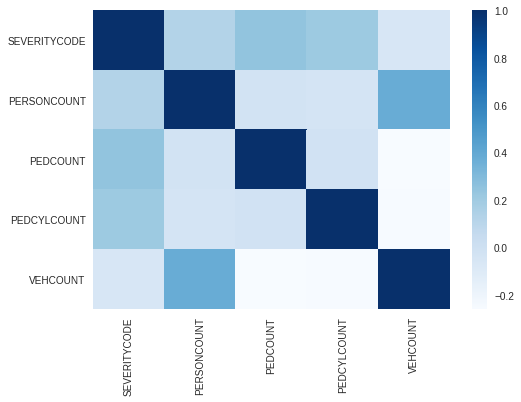

In [160]:
sns.heatmap(all_data_num.corr(), cmap="Blues")

Here we notice that the number of vehicle involved in an accident is positively associated with the number of people involved, which makes sense, but other than than, there is not much useful information here. 

### Time Series Analysis

In [161]:
all_data['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
time = df[['INCDTTM', 'SEVERITYCODE']]
time['Year_Month'] = all_data['INCDTTM'].dt.strftime('%Y/%m')
time.head()

,INCDTTM,SEVERITYCODE,Year_Month
0,3/27/2013 2:54:00 PM,2,2013/03
1,12/20/2006 6:55:00 PM,1,2006/12
2,11/18/2004 10:20:00 AM,1,2004/11
3,3/29/2013 9:26:00 AM,1,2013/03
4,1/28/2004 8:04:00 AM,2,2004/01


In [162]:
time_sorted = time.set_index('Year_Month').sort_index()
time_sorted.reset_index(inplace = True)

### Monthly Road Accident Count Over Time

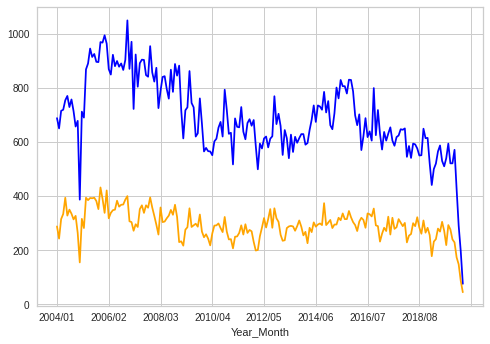

In [163]:
cd_1 = time_sorted[time_sorted['SEVERITYCODE'] == 1]
grp_1 = cd_1.groupby(['Year_Month'])
grp_1.size().plot(kind = 'line', color = 'blue')
cd_2 = time_sorted[time_sorted['SEVERITYCODE'] == 2]
grp_2 = cd_2.groupby(['Year_Month'])
grp_2.size().plot(kind = 'line', color = 'orange')
plt.show()

We can see that From 2004 to 2020, the count of car accidents have dropped significantly. Note that there is a big jump around November 2004 and a big drop starting February 2019. 

### Road Accidents Count VS Day of Week

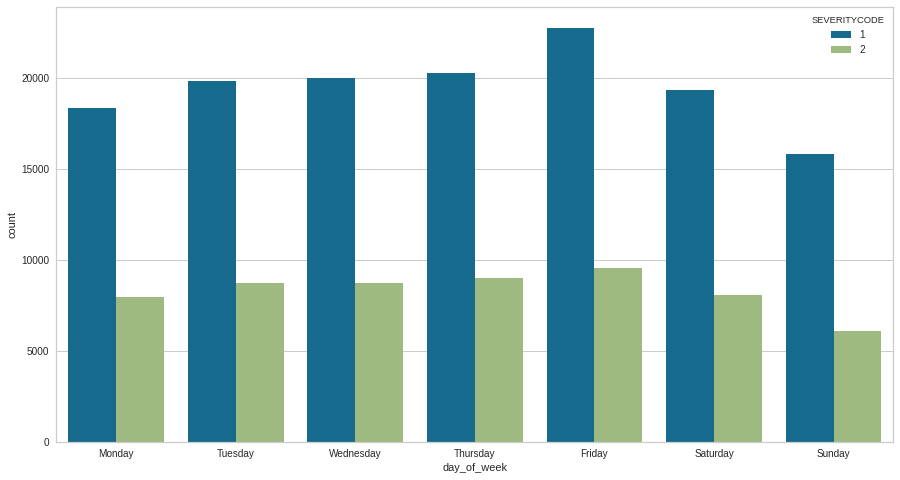

In [164]:
time['day_of_week'] = all_data['INCDTTM'].dt.day_name()
plt.figure(figsize = (15, 8))
sns.countplot(x="day_of_week", hue="SEVERITYCODE", data=time, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

### Road Accidents Count VS Months

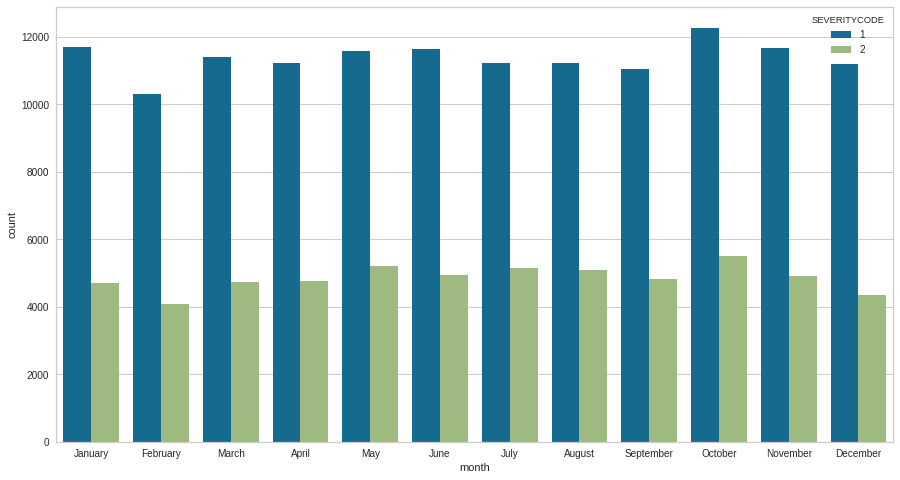

In [165]:
time['month'] = all_data['INCDTTM'].dt.month_name()
plt.figure(figsize = (15, 8))
sns.countplot(x="month", hue="SEVERITYCODE", data=time, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

We can see from the time series analysis that Friday has the highest accident count and Sunday has the lowest in a week. 
When we look at the months, we notice that October has the highest accident count and February has the lowest. 

## Geographical Analysis

In [166]:
seattle = gpd.read_file(r'Street_Network_Database__SND_.shp')
df_geo = all_data[['X', 'Y', 'SEVERITYCODE']]
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_geo['X'], df_geo['Y'])]
df_geo = gpd.GeoDataFrame(df_geo, crs = crs, geometry = geometry)

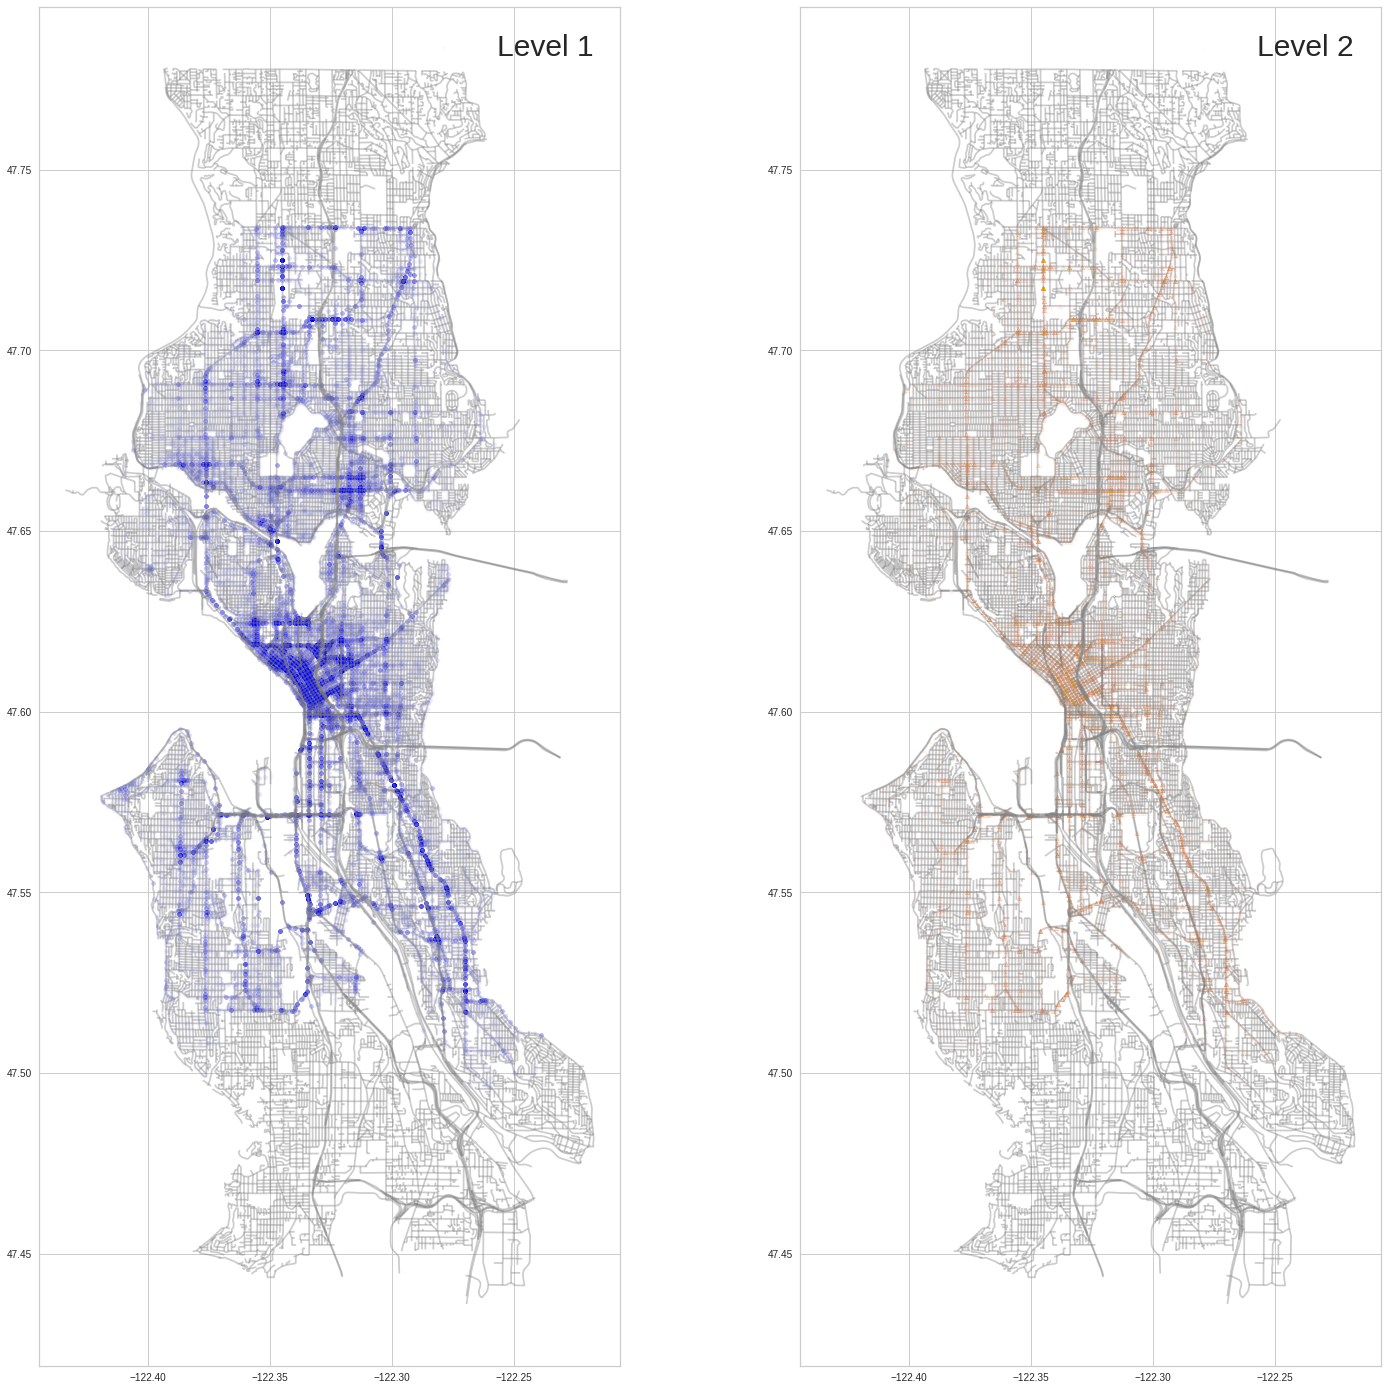

In [167]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 25))
seattle.plot(ax = ax[0], alpha = 0.6, color = 'grey')
df_geo[df_geo['SEVERITYCODE'] == 1].plot(ax = ax[0], markersize = 20, color = 'blue', marker = 'o', label = 'Level 1', alpha = 0.01)
ax[0].legend(prop={'size': 30})
seattle.plot(ax = ax[1], alpha = 0.6, color = 'grey')
df_geo[df_geo['SEVERITYCODE'] == 2].plot(ax = ax[1], markersize = 20, color = 'orange', marker = '^', label = 'Level 2', alpha = 0.01)
ax[1].legend(prop={'size': 30})

Here we see that there is no obvious distinction in terms of the location of where accidents happen. Both level 1 and level 2 accidents seem to distribute in similar areas. 

## 5. Feature Selection

In this part, we need to decide what variables to keep and what variables to drop for further analysis. First we will look at information about the missing values again, which will help us decide what variables to keep or drop. 

In [168]:
missing_data.head(19)

,Total,Percent
PEDROWNOTGRNT,190006,0.976026
EXCEPTRSNDESC,189035,0.971039
SPEEDING,185340,0.952058
INATTENTIONIND,164868,0.846897
INTKEY,129603,0.665747
EXCEPTRSNCODE,109862,0.564341
SDOTCOLNUM,79737,0.409595
JUNCTIONTYPE,6329,0.032511
Y,5334,0.027400
X,5334,0.027400


For this project, we will drop the following features due to given reasons:
1. 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'INTKEY','SEGLANEKEY', 'CROSSWALKKEY': unique identifiers for each for reported road accidents and location where accidents happened, which doesn't help us predict the severity of car accidents. 
2. 'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'SDOT_COLDESC', 'ST_COLDESC': text variables that will not be used for this particular project. 
3. 'SDOT_COLCODE', 'SDOTCOLNUM', 'ST_COLCODE': too many levels of values and missing values. 
4. 'INCDATE', 'INCDTTM': Time series data that will not be used for this particular project. 


Therefore, for baseline model performance, we will use the following variables to train the models. 

In [169]:
features = ['SEVERITYCODE', 'ADDRTYPE', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING','HITPARKEDCAR']
all_data = all_data[features]

## 6. Data Preprocessing for Machine Learning

### Data Cleaning

In this part, we need to deal with the remaining missing values.

In [170]:
total_ = all_data.isnull().sum().sort_values(ascending=False)
percent_ = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data_ = pd.concat([total_, percent_], axis=1, keys=['Total', 'Percent'])
missing_data_.head(7)

,Total,Percent
JUNCTIONTYPE,6329,0.032511
LIGHTCOND,5170,0.026557
WEATHER,5081,0.026100
ROADCOND,5012,0.025746
COLLISIONTYPE,4904,0.025191
ADDRTYPE,1926,0.009894
HITPARKEDCAR,0,0.000000


Since the missing values only take up 3% of the data, we can drop these rows without sacrificing too much of the model performance. 

In [171]:
all_data.dropna(inplace = True)
all_data.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
HITPARKEDCAR      0
dtype: int64

In [172]:
all_data.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,0,Overcast,Wet,Daylight,0,0,0
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),0,0,Raining,Wet,Dark - Street Lights On,0,0,0
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),0,0,Overcast,Dry,Daylight,0,0,0
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),0,0,Clear,Dry,Daylight,0,0,0
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),0,0,Raining,Wet,Daylight,0,0,0


### Transform Categorical Variables (One-Hot Coding)

In [173]:
all_data_cat = all_data[['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'LIGHTCOND', 'WEATHER', 'ROADCOND']]
dummies = pd.get_dummies(all_data_cat)
all_data = pd.concat([all_data, dummies], axis=1)
all_data.drop(['ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'LIGHTCOND', 'WEATHER', 'ROADCOND'], axis = 1, inplace = True)

In [174]:
all_data.columns.values

array(['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT',
       'VEHCOUNT', 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT',
       'SPEEDING', 'HITPARKEDCAR', 'ADDRTYPE_Alley', 'ADDRTYPE_Block',
       'ADDRTYPE_Intersection', 'COLLISIONTYPE_Angles',
       'COLLISIONTYPE_Cycles', 'COLLISIONTYPE_Head On',
       'COLLISIONTYPE_Left Turn', 'COLLISIONTYPE_Other',
       'COLLISIONTYPE_Parked Car', 'COLLISIONTYPE_Pedestrian',
       'COLLISIONTYPE_Rear Ended', 'COLLISIONTYPE_Right Turn',
       'COLLISIONTYPE_Sideswipe',
       'JUNCTIONTYPE_At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Ramp Junction', 'JUNCTIONTYPE_Unknown',
       'LIGHTCOND_Dark - No Street Lights',
       'LIGHTCOND_Dark - Street Lights Off',
       'LIGHTCOND_D

### Standardize Variables

In [175]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scale = StandardScaler()
all_data[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']] = scale.fit_transform(all_data[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']])

### Split Train and Test Dataset

In [176]:
X = all_data.loc[:, all_data.columns != 'SEVERITYCODE'].values.astype(float)
y = all_data['SEVERITYCODE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [177]:
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

print('\n')
print('No. of Level 1 and Level 2 accidents in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of Level 1 and Level 2 accidents in the test set:')
print(y_test.value_counts())

No. of samples in training set:  128026
No. of samples in validation set: 54869


No. of Level 1 and Level 2 accidents in the training set:
1    88269
2    39757
Name: SEVERITYCODE, dtype: int64


No. of Level 1 and Level 2 accidents in the test set:
1    38001
2    16868
Name: SEVERITYCODE, dtype: int64


## 7. Model Building
In this part, we will start building machine learning models for this project. For the purpose of this project, I will feed the training dataset to the following machine learning algorithms: 
1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbors
4. Random Forest
5. XGBoost

For this particular project, I will not use SVM simply because the dataset is too large for training the model. I will first build these models using the default parameters and evaluate the baseline performance by looking at evluation metrics. We will pick 3 out of all 5 models based on performance scores and then we will fine-tune the parameters using GridSearchCV to further improve the performance of these 3 models. 

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import f1_score

### Logistic Regression

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     38001
           2       0.72      0.30      0.42     16868

    accuracy                           0.75     54869
   macro avg       0.74      0.62      0.63     54869
weighted avg       0.74      0.75      0.71     54869

Test set Accuracy:  0.7485100876633436
[[36036  1965]
 [11834  5034]]


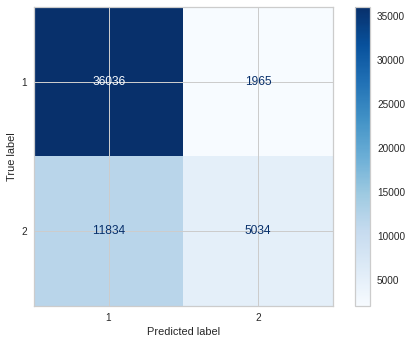

In [222]:
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(X_test)
disp_lr = plot_confusion_matrix(lr, X_test, y_test,cmap=plt.cm.Blues)
accuracy_lr = accuracy_score(y_test, y_predict_lr)
f1_lr = f1_score(y_test, y_predict_lr, average='weighted')
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_lr))
print(disp_lr.confusion_matrix)

**ROC CURVE AND AUC**

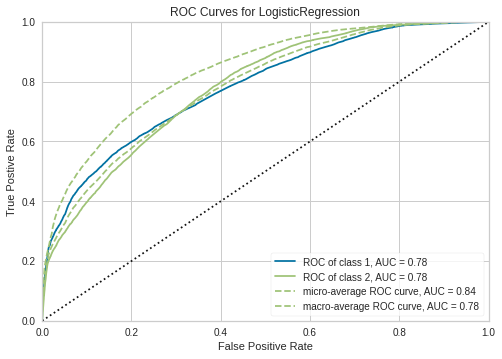

In [180]:
visualizer_lr = ROCAUC(lr)
visualizer_lr.fit(X_train, y_train)  
visualizer_lr.score(X_test, y_test)  
g_lr = visualizer_lr.poof()           

### Decision Tree

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     38001
           2       0.65      0.34      0.45     16868

    accuracy                           0.74     54869
   macro avg       0.70      0.63      0.64     54869
weighted avg       0.73      0.74      0.71     54869

Test set Accuracy:  0.7409466183090634
[[34917  3084]
 [11130  5738]]


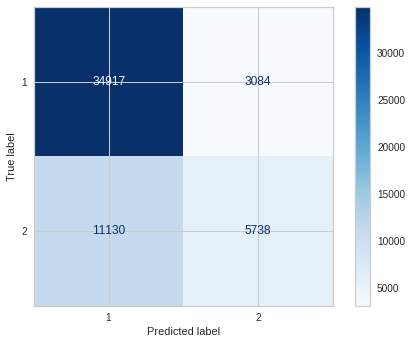

In [196]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train, y_train)
y_predict_dt = dt.predict(X_test)
disp_dt = plot_confusion_matrix(dt, X_test, y_test,cmap=plt.cm.Blues)
accuracy_dt = accuracy_score(y_test, y_predict_dt)
f1_dt = f1_score(y_test, y_predict_dt, average='weighted')
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_dt))
print(disp_dt.confusion_matrix)

**ROC CURVE AND AUC**

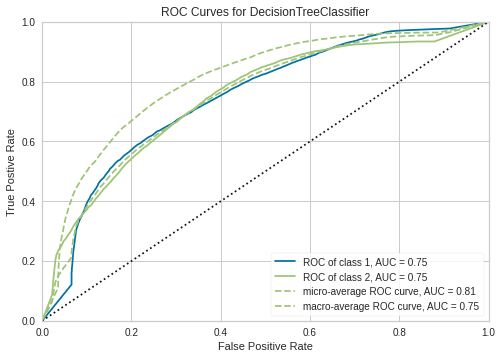

In [182]:
visualizer_dt = ROCAUC(dt)
visualizer_dt.fit(X_train, y_train)  
visualizer_dt.score(X_test, y_test)  
g_dt = visualizer_dt.poof()   

### K-Nearst Neighbors (KNN)

              precision    recall  f1-score   support

           1       0.77      0.86      0.81     38001
           2       0.57      0.43      0.49     16868

    accuracy                           0.73     54869
   macro avg       0.67      0.64      0.65     54869
weighted avg       0.71      0.73      0.71     54869

Test set Accuracy:  0.7259290309646613
[[32625  5376]
 [ 9662  7206]]


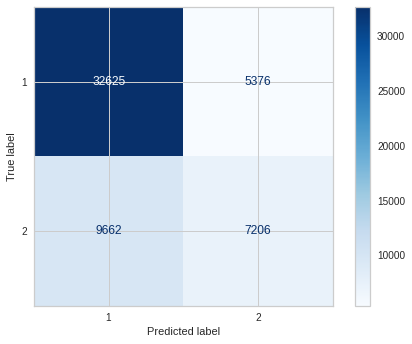

In [183]:
knn = KNeighborsClassifier(n_jobs = -1, random_state = 0)
knn.fit(X_train, y_train)
y_predict_knn = knn.predict(X_test)
disp_knn = plot_confusion_matrix(knn, X_test, y_test,cmap=plt.cm.Blues)
accuracy_knn = accuracy_score(y_test, y_predict_knn)
f1_knn = f1_score(y_test, y_predict_knn, average='weighted')
print(classification_report(y_test, y_predict_knn))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_knn))
print(disp_knn.confusion_matrix)

**ROC CURVE AND AUC**

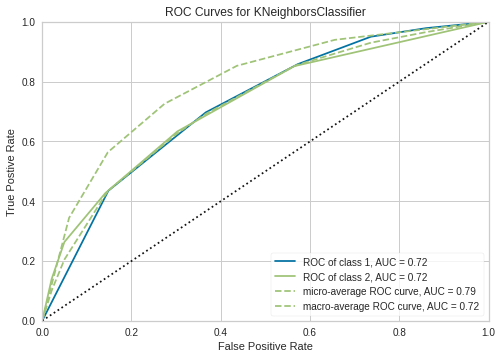

In [184]:
visualizer_knn = ROCAUC(knn)
visualizer_knn.fit(X_train, y_train)  
visualizer_knn.score(X_test, y_test)  
g_knn = visualizer_knn.poof()   

### XGBoost

              precision    recall  f1-score   support

           1       0.76      0.94      0.84     38001
           2       0.70      0.33      0.45     16868

    accuracy                           0.75     54869
   macro avg       0.73      0.64      0.65     54869
weighted avg       0.74      0.75      0.72     54869

Test set Accuracy:  0.7519911060890485
[[35632  2369]
 [11239  5629]]


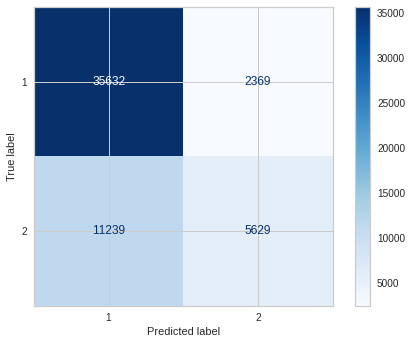

In [185]:
xgb = XGBClassifier(random_state =0)
xgb.fit(X_train, y_train)
y_predict_xgb = xgb.predict(X_test)
disp_xgb = plot_confusion_matrix(xgb, X_test, y_test,cmap=plt.cm.Blues)
accuracy_xgb = accuracy_score(y_test, y_predict_xgb)
f1_xgb = f1_score(y_test, y_predict_xgb, average='weighted')
print(classification_report(y_test, y_predict_xgb))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_xgb))
print(disp_xgb.confusion_matrix)

**ROC CURVE AND AUC**

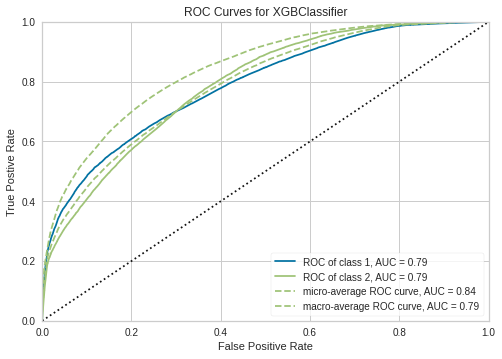

In [186]:
visualizer_xgb = ROCAUC(xgb)
visualizer_xgb.fit(X_train, y_train)  
visualizer_xgb.score(X_test, y_test)  
g_xgb = visualizer_xgb.poof()   

### Random Forest

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     38001
           2       0.66      0.35      0.46     16868

    accuracy                           0.74     54869
   macro avg       0.71      0.64      0.65     54869
weighted avg       0.73      0.74      0.72     54869

Test set Accuracy:  0.7442636096885309
[[34851  3150]
 [10882  5986]]


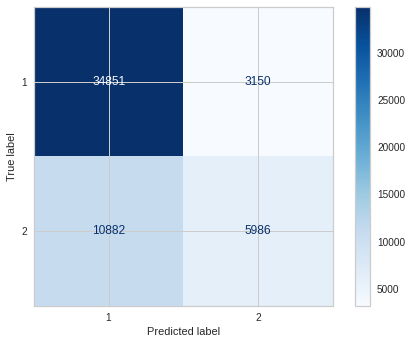

In [187]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)
y_predict_rf = rf.predict(X_test)
disp_rf = plot_confusion_matrix(rf, X_test, y_test,cmap=plt.cm.Blues)
accuracy_rf = accuracy_score(y_test, y_predict_rf)
f1_rf = f1_score(y_test, y_predict_rf, average='weighted')
print(classification_report(y_test, y_predict_rf))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_rf))
print(disp_rf.confusion_matrix)

**ROC CURVE AND AUC**

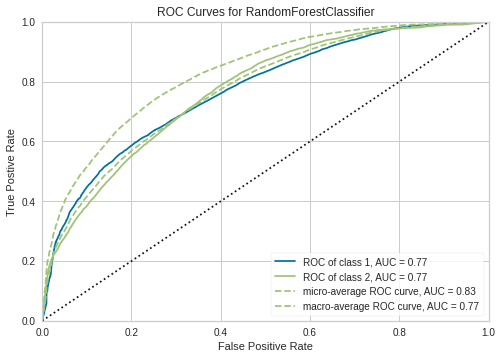

In [215]:
visualizer_rf = ROCAUC(rf)
visualizer_rf.fit(X_train, y_train)  
visualizer_rf.score(X_test, y_test)  
g_rf = visualizer_rf.poof()   

### Summary

In [188]:
thisdict = {
  "Algorithm": ['Logistic Regression', 'Decision Tree', 'KNN', 'XGBoost', 'Random Forest'],
  "Accuracy": [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_xgb, accuracy_rf],
  "F1-score": [f1_lr, f1_dt, f1_knn, f1_xgb, f1_rf],
}
pd.DataFrame(thisdict).sort_values('Accuracy', ascending = False)

,Algorithm,Accuracy,F1-score
3,XGBoost,0.751991,0.720717
0,Logistic Regression,0.748510,0.710966
4,Random Forest,0.744264,0.718051
1,Decision Tree,0.741001,0.713001
2,KNN,0.725929,0.713301


Here we can see that, for baseline performance, **XGBoost**, **Logistic Regression** and **Random Forest** models have the highest performance scores. In the next step, we will fine tune these models. 

## 8. Tuning Model Performance

At this part, we are going to tune the models to improve their performances. The method that we are going to use is GridSearchCV. We will pass in a series of parameters and let it return the model parameters with the best accuracy score. 

### Logistic Regression Tuning

In [189]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [190]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [191]:
lr_tuned = LogisticRegression(random_state = 0)
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_lr = clf_lr.fit(X_train,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.8min finished


Logistic Regression
Best Score: 0.7497617669579645
Best Parameters: {'C': 0.012742749857031334, 'max_iter': 2000, 'penalty': 'l1', 'solver': 'liblinear'}


**Evaluation**

              precision    recall  f1-score   support

           1       0.75      0.95      0.84     38001
           2       0.74      0.29      0.41     16868

    accuracy                           0.75     54869
   macro avg       0.74      0.62      0.63     54869
weighted avg       0.75      0.75      0.71     54869

Test set Accuracy:  0.7496947274417248
[[36286  1715]
 [12019  4849]]


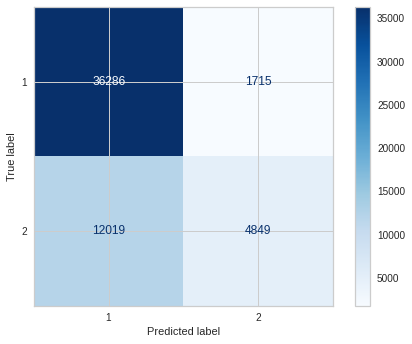

In [223]:
lr_tuned = LogisticRegression(C=0.012742749857031334, max_iter=2000, penalty='l1', solver='liblinear', random_state = 0)
lr_tuned.fit(X_train, y_train)
y_predict_lr = lr_tuned.predict(X_test)
disp_lr = plot_confusion_matrix(lr_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_lr_tuned = accuracy_score(y_test, y_predict_lr)
f1_lr_tuned = f1_score(y_test, y_predict_lr, average='weighted')
print(classification_report(y_test, y_predict_lr))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_lr))
print(disp_lr.confusion_matrix)

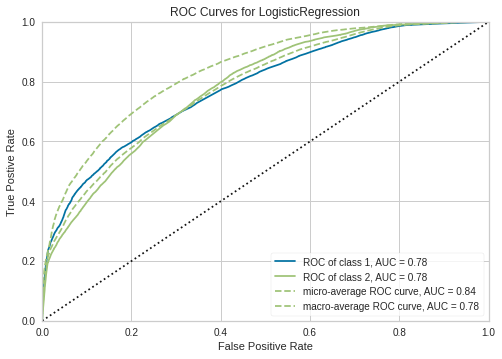

In [200]:
visualizer_lr = ROCAUC(lr_tuned)
visualizer_lr.fit(X_train, y_train)  
visualizer_lr.score(X_test, y_test)  
g_lr = visualizer_lr.poof()           

### Decision Tree Tuning

In [202]:
dt_tuned = DecisionTreeClassifier(random_state = 0)
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]}

clf_dt = GridSearchCV(dt_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_dt = clf_dt.fit(X_train,y_train)
clf_performance(best_clf_dt,'Decision Tree')

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:   33.7s finished


Decision Tree
Best Score: 0.7498242623794342
Best Parameters: {'criterion': 'entropy', 'max_depth': 9}


**Evaluation**

              precision    recall  f1-score   support

           1       0.76      0.94      0.84     38001
           2       0.70      0.32      0.44     16868

    accuracy                           0.75     54869
   macro avg       0.73      0.63      0.64     54869
weighted avg       0.74      0.75      0.72     54869

Test set Accuracy:  0.7491479706209335
[[35748  2253]
 [11512  5356]]


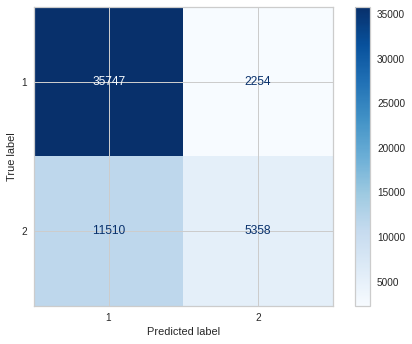

In [203]:
dt_tuned = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state = 0)
dt_tuned.fit(X_train, y_train)
y_predict_dt = dt_tuned.predict(X_test)
disp_dt_tuned = plot_confusion_matrix(dt_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_dt_tuned = accuracy_score(y_test, y_predict_dt)
f1_dt_tuned = f1_score(y_test, y_predict_dt, average='weighted')
print(classification_report(y_test, y_predict_dt))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_dt))
print(disp_dt.confusion_matrix)

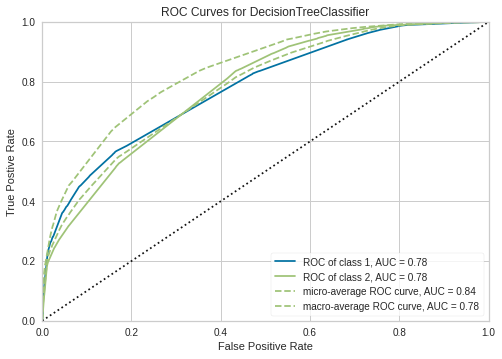

In [204]:
visualizer_dt = ROCAUC(dt_tuned)
visualizer_dt.fit(X_train, y_train)  
visualizer_dt.score(X_test, y_test)  
g_dt = visualizer_dt.poof()  

### Random Forest Tuning

In [206]:
rf_tuned = RandomForestClassifier(random_state = 0)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy']}
                                  
clf_rf = GridSearchCV(rf_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 23.3min finished


Random Forest
Best Score: 0.7400840602510246
Best Parameters: {'criterion': 'gini', 'n_estimators': 450}


**Evaluation**

              precision    recall  f1-score   support

           1       0.76      0.92      0.83     38001
           2       0.65      0.36      0.46     16868

    accuracy                           0.74     54869
   macro avg       0.71      0.64      0.65     54869
weighted avg       0.73      0.74      0.72     54869

Test set Accuracy:  0.7441178078696532
[[34851  3150]
 [10882  5986]]


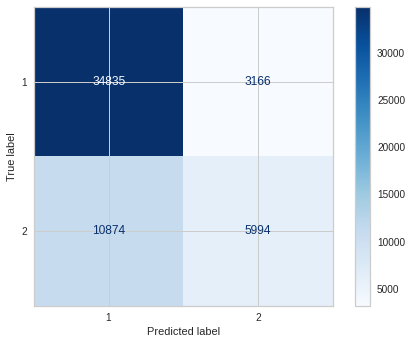

In [214]:
rf_tuned = RandomForestClassifier(random_state = 0, 
                                 criterion='gini', 
                                  n_estimators=450)
rf_tuned.fit(X_train, y_train)
y_predict_rf_tuned = rf_tuned.predict(X_test)
disp_rf_tuned = plot_confusion_matrix(rf_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_rf_tuned = accuracy_score(y_test, y_predict_rf_tuned)
f1_rf_tuned = f1_score(y_test, y_predict_rf_tuned, average='weighted')
print(classification_report(y_test, y_predict_rf_tuned))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_rf_tuned))
print(disp_rf.confusion_matrix)

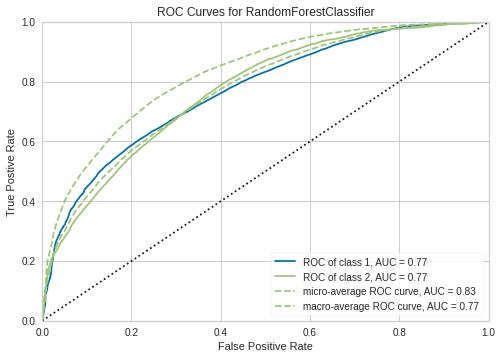

In [254]:
visualizer_rf_tuned = ROCAUC(rf_tuned)
visualizer_rf_tuned.fit(X_train, y_train)  
visualizer_rf_tuned.score(X_test, y_test)  
g_rf_tuned = visualizer_rf_tuned.poof()   

### XGBoost Tuning

In [210]:
xgb_tuned = XGBClassifier(random_state = 0)
param_grid = {
    'n_estimators': [450,500,550],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}
clf_xgb = GridSearchCV(xgb_tuned, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1, scoring='accuracy')
best_clf_xgb = clf_xgb.fit(X_train,y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 40.0min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 124.3min finished


XGB
Best Score: 0.7515973389304154
Best Parameters: {'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 10, 'sampling_method': 'uniform'}


**Evaluation**

              precision    recall  f1-score   support

           1       0.76      0.94      0.84     38001
           2       0.72      0.32      0.44     16868

    accuracy                           0.75     54869
   macro avg       0.74      0.63      0.64     54869
weighted avg       0.75      0.75      0.72     54869

Test set Accuracy:  0.7524649620004009
[[35632  2369]
 [11239  5629]]


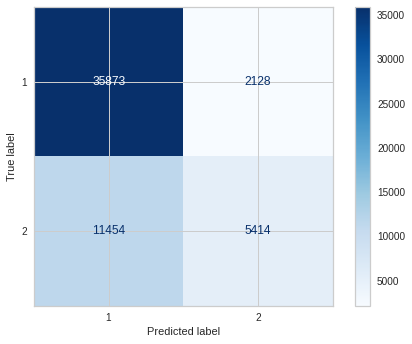

In [212]:
xgb_tuned = XGBClassifier(random_state =0, 
                          gamma=2, 
                          learning_rate=0.5, 
                          max_depth=None, 
                          min_child_weight=0.01, 
                          n_estimators=450, 
                          reg_alpha=1, 
                          reg_lambda=10, 
                          sampling_method='uniform')
xgb_tuned.fit(X_train, y_train)
y_predict_xgb_tuned = xgb_tuned.predict(X_test)
disp_xgb_tuned = plot_confusion_matrix(xgb_tuned, X_test, y_test,cmap=plt.cm.Blues)
accuracy_xgb_tuned = accuracy_score(y_test, y_predict_xgb_tuned)
f1_xgb_tuned = f1_score(y_test, y_predict_xgb_tuned, average='weighted')
print(classification_report(y_test, y_predict_xgb_tuned))
print("Test set Accuracy: ", accuracy_score(y_test, y_predict_xgb_tuned))
print(disp_xgb.confusion_matrix)

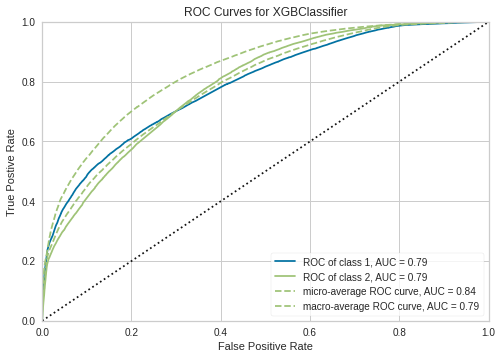

In [213]:
visualizer_xgb_tuned = ROCAUC(xgb_tuned)
visualizer_xgb_tuned.fit(X_train, y_train)  
visualizer_xgb_tuned.score(X_test, y_test)  
g_xgb_tuned = visualizer_xgb_tuned.poof()  

In [255]:
Dist = {
  "Algorithm": ['Logistic Regression', 'Decision Tree', 'KNN', 'XGBoost', 'Random Forest'],
  "Baseline accuracy": [accuracy_lr, accuracy_dt, accuracy_knn, accuracy_xgb, accuracy_rf],
  "Tuned accuracy": [accuracy_lr_tuned, accuracy_dt_tuned, 0, accuracy_xgb_tuned, accuracy_rf_tuned],
    
}
result = pd.DataFrame(Dist).sort_values(by = ['Tuned accuracy'], ascending = False, na_position="last").reset_index(drop=True)
result.loc[4, 'Tuned accuracy'] = 'NA'
result

,Algorithm,Baseline accuracy,Tuned accuracy
0,XGBoost,0.751991,0.752465
1,Logistic Regression,0.748510,0.749695
2,Decision Tree,0.749130,0.749148
3,Random Forest,0.744264,0.744118
4,KNN,0.725929,NA


## 9. Results

In this project, we collected the dataset published by the Seattle Transportation Department regarding car accidents records. Then we further analyzed the data by using statistic measures and data visualization and found some interesting patterns about how each feature in the dataset may contribute to the severity of car accidents. Time series and simple geographical analysis were also performed to see the overall trend of car accidents over time as well as to find any pattern of where car accidents happen. Our goal here is to try to build a machine learning model to predict whether a car accidents is either level 1 accident or level 2 accident. We then performed data cleaning, data transformation, and data standardization to prepare for model building. We picked 5 algorthms: Logistic Regression, Decision Tree classifier, Random Forest, K-Nearest Neighbors, and XGBoost and evaluate their baseline performance. We evaluated the confusion matrix, F1 score, and ROC/AUC curve of each model and chose the best 4 models for further fine tuning. We used GridSearchCV and iterate through a list of parameters to find the one with highest score. XGBoost has the highest socre with 75.25% accuracy and 0.72 F1-score. 

## 10. Discussion

The overall model performance is okay but there is still some room for improvement. For example, we can do more feature engineering to drop some features increase the performance score on the test dataset. Due to the limitation of computing ability, SVM algorithm was not able to be performed, we will try to find a platform with higher computation capability to try more algorighms and different parameter tuning methods to improve the model performance. 